<a href="https://colab.research.google.com/github/Dimpal16/Digit-Recognition/blob/master/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.special
import pandas as pd
import matplotlib.pyplot as plt
import os

In [0]:
class neuralNetwork:
  def __init__(self, i_nodes, h_nodes, o_nodes, lr):
    self.i_nodes = i_nodes
    self.h_nodes = h_nodes
    self.o_nodes = o_nodes
    self.lr = lr

    #Try ReLU and different activation fuantion and compare the output
    self.activation_function = lambda x: scipy.special.expit(x)

    self.W_ih = np.random.normal(0.0, pow(self.i_nodes, -0.5), (self.h_nodes, self.i_nodes)) 
    self.W_ho = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.o_nodes, self.h_nodes))
    pass

  def train(self, inputs, targets):
    inputs = np.array(inputs, ndmin=2).T
    targets = np.array(targets, ndmin=2).T

    hidden_input = np.dot(self.W_ih, inputs)
    hidden_output = self.activation_function(hidden_input)

    final_input = np.dot(self.W_ho, hidden_output)
    final_output = self.activation_function(final_input)

    output_errors = targets - final_output
    hidden_errors = np.dot(self.W_ho.T, output_errors)

    self.W_ho += self.lr* np.dot((output_errors*final_output*(1-final_output)), hidden_output.transpose()) 
    self.W_ih += self.lr* np.dot((hidden_errors*hidden_output*(1-hidden_output)), inputs.transpose())
    pass

  def test(self, inputs):
    inputs = np.array(inputs, ndmin = 2).T

    hidden_input = np.dot(self.W_ih, inputs)
    hidden_output = self.activation_function(hidden_input)

    final_input = np.dot(self.W_ho, hidden_output)
    final_output = self.activation_function(final_input)
    
    return final_output


In [0]:
input_nodes = 784
hidden_nodes =100
output_nodes = 10

lr = 0.5

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

In [0]:
train_df = pd.read_csv(os.getcwd() + '/mnist_train_small.csv')
test_df = pd.read_csv(os.getcwd() + '/mnist_test.csv')

type(data)   --> pandas.DataFrame<br>
data.dtypes  --> inferred type of the cols<br>
data.index   --> row labels of the dataFrame<br>
data.shape   --> returns (rows, cols)<br>
data.values  --> converts the dataFrame into an ndarray<br>
data.info() <br>
pd.isnull(data).any() --> finds null values if any<br>
data.columns  --> column lables

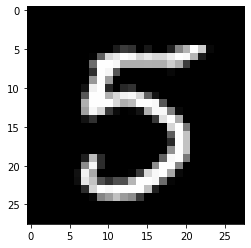

In [99]:
#Visualizing the data
x = train_df.iloc[0]         #Change the index inside .iloc to see other images
x = np.transpose(x[1:])
x = np.asfarray(x).reshape(28,28)

plt.imshow(x, cmap='gray')

In [0]:
def training(train_df):
  train_df = np.asfarray(train_df)
  for row in train_df:
    all_values = np.asarray(row)
    scaled_input = np.asfarray((row[1:]/255)*0.99 + 0.01)
    target_value = np.zeros(output_nodes) + 0.01
    target_value[int(all_values[0])] = 0.99

    nn.train(scaled_input, target_value)
    pass


In [0]:
#testing the results
def testing(test_df):
  test_df = np.asarray(test_df)
  score = 0
  total = 0
  for i in range(len(test_df)):
    x = test_df[i]
    output = nn.test(x[1:])
    pred_value = np.argmax(output)
    actual_value = x[0]
    total +=1
    if pred_value == actual_value:
      score +=1 
    pass 


In [0]:
#Repeat the training several times against the data set --> each run is called an epoch

#plot epoch vs. accuracy graph with different lr
epoch = 3  

for e in range(epoch):
  training(train_df)
  pass 

testing(test_df)

In [103]:
#Plot learning rate vs. accuracy graph and find which learning rate produces best reults
accuracy = score/total *100
print(accuracy)

91.92919291929192


In [0]:
#try changing the hidden_nodes and see the accuracy 